# Guided Project: Finding Heavy Traffic Indicators on I-94
### Author: Marwin M I B Carmo

## Introduction

In this project we will practice data exploration and visualization. The chosen dataset provides the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). It can be dowloaded from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

In this analysis we will search for some indicators of heavy traffict on I-94.

In [3]:
# importing packages and reading the dataset
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

traffic = pd.read_csv('data/Metro_Interstate_Traffic_Volume.csv')

In [4]:
# inspecting first five rows
print(traffic.head(5))

# inspecting last five rows
print(traffic.tail(5))

# Exploring dataset info
traffic.info()

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

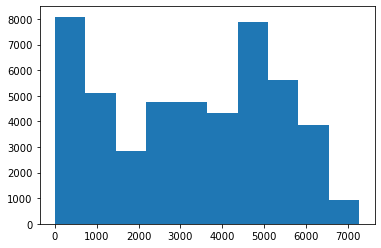

In [5]:
# histogram of traffic_volume column

plt.hist(traffic['traffic_volume'])
plt.show()

In [6]:
# traffic_volume information

traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Inspecting the output from `traffic_volume` column, we see that the distribution looks bimodal. The first quartile says that about 25% of the time, there were 1,193 cars at maximum passing the station each hour. On the other extremity, the third quartile inform us that about 25% of the time, the traffic volume increased to at least 4,933 cars each hour.

There is a strong suspicion that the taffic volume is influeced by the time of the day. To help the investigation, we will divide the dataset into **daytime** data (7 a.m. to 7 p.m.) and **nighttime** data (7 p.m. to 7 a.m.).

## Traffic Volume: Day vs. Night

In [7]:
# first we need to transform the date_time column into datetime object

traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [8]:
# now we isolate the daytime and nighttime data
daytime_data = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour <= 19)]

nighttime_data = traffic[(traffic['date_time'].dt.hour <= 7) | (traffic['date_time'].dt.hour >= 19)]

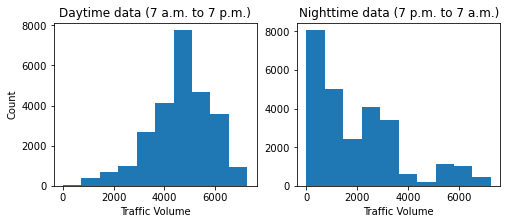

In [9]:
# plotting the histogram for both time separated datasets

# we need a grid chart with two columns and one row:

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.hist(daytime_data['traffic_volume'])
plt.title('Daytime data (7 a.m. to 7 p.m.)')
plt.xlabel('Traffic Volume')
plt.ylabel('Count')
plt.subplot(1,2,2)
plt.hist(nighttime_data['traffic_volume'])
plt.title('Nighttime data (7 p.m. to 7 a.m.)')
plt.xlabel('Traffic Volume')
plt.show()

In [10]:
# exploring traffic_volume statistics for daytime data

daytime_data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,25838.000000,25838.000000,25838.000000,25838.000000,25838.000000
mean,282.347796,0.502320,0.000234,53.040135,4649.292360
std,13.302562,61.167614,0.008511,37.590946,1202.321987
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.720000,0.000000,0.000000,5.000000,4021.000000
50%,283.867000,0.000000,0.000000,75.000000,4736.000000
75%,293.610000,0.000000,0.000000,90.000000,5458.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [11]:
# exploring traffic_volume statistics for nighttime data

nighttime_data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,26406.000000,26406.000000,26406.000000,26406.000000,26406.000000
mean,280.041662,0.142964,0.000181,46.043021,2018.015375
std,13.312483,1.131005,0.007148,39.995392,1713.201969
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.600000,0.000000,0.000000,1.000000,581.000000
50%,281.280000,0.000000,0.000000,40.000000,1485.000000
75%,290.550000,0.000000,0.000000,90.000000,2934.000000
max,307.680000,55.630000,0.510000,100.000000,7260.000000


Examining the histograms we see that for daytime, the data for volume values are described by an approximately normal distribution. As for the nighttime data, the histogram assumes a rightly skewed shape.

The traffic volume during the day has a mean around 4649 and its normal shaped distribution indicates that we should expect values around this mean very often.

At night, we see a histogram peaked at values closer to 0, and mostly under 4000. As expected, this indicates that we should expect low traffic volume at nighttime.

## Time indicators

Another indicator of traffic volume is time. It is reasonable to suppose that the traffic volume change according to indicators as month, day of the week or time of the day.

To start, we can analyze the monthly traffic volume.

In [12]:
# monthly traffic volume average

traffic['month'] = traffic['date_time'].dt.month
by_month = traffic.groupby('month').mean()
by_month['traffic_volume']

month
1     3051.081378
2     3197.945547
3     3308.388611
4     3304.372388
5     3366.319432
6     3419.077413
7     3205.481752
8     3394.241891
9     3303.049334
10    3390.678376
11    3167.592784
12    3024.257943
Name: traffic_volume, dtype: float64

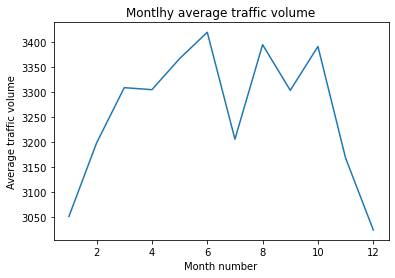

In [19]:
plt.plot(by_month['traffic_volume'])
plt.title('Montlhy average traffic volume')
plt.xlabel('Month number')
plt.ylabel('Average traffic volume')
plt.show()

As expected the traffic volume decreases at the end and beggining of the year. In holidays season people go on vacation or just have more time at home with family or friends. Another point of inflection is the month of July. In USA [July][1] is the month of the highly celebrated [American Independence Day][2]. It is also, on average, the warmest month of the year, so a reduction on work days is expected.

[1]: https://en.wikipedia.org/wiki/July
[2]: https://en.wikipedia.org/wiki/Independence_Day_(United_States)

In [25]:
# traffic average per day of the week

traffic['dayofweek'] = traffic['date_time'].dt.dayofweek
by_dayofweek = traffic.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

dayofweek
0    3309.387161
1    3488.555799
2    3583.196681
3    3637.899663
4    3656.358836
5    2773.638120
6    2368.588329
Name: traffic_volume, dtype: float64

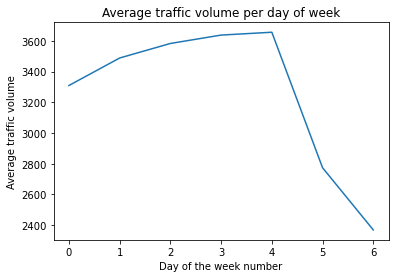

In [26]:
plt.plot(by_dayofweek['traffic_volume'])
plt.title('Average traffic volume per day of week')
plt.xlabel('Day of the week number')
plt.ylabel('Average traffic volume')
plt.show()

No surprises here either. Because most people do not go to office on weekends, the average traffic volume on saturday and sunday decreases greatly.